In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import pandas as pd


In [2]:
import os
os.getcwd()

'C:\\Users\\asma0'

In [3]:
os.chdir(r"C:\Users\asma0\OneDrive\Desktop\Beans_project")


In [4]:
import os
os.getcwd()

'C:\\Users\\asma0\\OneDrive\\Desktop\\Beans_project'

In [5]:
df_test = pd.read_csv('C://Users//asma0//OneDrive//Desktop//Beans_project//test.csv')

In [6]:
df_test

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0     29380    624.110       212.826130       175.931143      1.209713   
1     30008    645.884       210.557999       182.516516      1.153638   
2     30279    634.927       212.560556       181.510182      1.171067   
3     31107    640.594       214.648549       184.969253      1.160455   
4     31203    639.782       215.067737       184.874876      1.163315   
...     ...        ...              ...              ...           ...   
4078  41979    757.238       272.579920       196.580706      1.386606   
4079  42008    759.454       280.332717       191.218136      1.466036   
4080  42012    778.043       297.912812       179.711836      1.657725   
4081  42070    760.701       276.691651       193.945366      1.426647   
4082  42101    757.499       281.576392       190.713136      1.476439   

      Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0         0.562727       29690     193.410904  0.778113  0.989559   0.947849   
1         0.498616       30724     195.467062  0.782681  0.976696   0.903936   
2         0.520401       30600     196.347702  0.775688  0.989510   0.943852   
3         0.507366       31423     199.014227  0.761046  0.989944   0.952582   
4         0.510947       31558     199.321081  0.762984  0.988751   0.957949   
...            ...         ...            ...       ...       ...        ...   
4078      0.692742       42362     231.191096  0.722381  0.990959   0.919977   
4079      0.731248       42419     231.270938  0.711710  0.990311   0.915248   
4080      0.797562       42544     231.281949  0.715805  0.987495   0.872120   
4081      0.713216       42458     231.441543  0.730813  0.990862   0.913596   
4082      0.735702       42494     231.526798  0.799943  0.990752   0.922015   

      Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0        0.908774      0.007244      0.003048      0.825871      0.999066   
1        0.928329      0.007017      0.003215      0.861794      0.994199   
2        0.923726      0.007020      0.003153      0.853270      0.999236   
3        0.927163      0.006900      0.003145      0.859632      0.997564   
4        0.926783      0.006893      0.003137      0.858926      0.999202   
...           ...           ...           ...           ...           ...   
4078     0.848159      0.006493      0.002073      0.719374      0.997487   
4079     0.824987      0.006673      0.001907      0.680604      0.997790   
4080     0.776341      0.007091      0.001589      0.602705      0.999120   
4081     0.836460      0.006577      0.001986      0.699666      0.998176   
4082     0.822252      0.006688      0.001886      0.676099      0.998219   

         Class  
0        SEKER  
1        SEKER  
2        SEKER  
3        SEKER  
4        SEKER  
...        ...  
4078  DERMASON  
4079  DERMASON  
4080  DERMASON  
4081  DERMASON  
4082  DERMASON  

[4083 rows x 17 columns]

In [7]:
### Pre-processing, data analysis and understanding

In [8]:
df_test.isna().sum() # no null values

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [9]:
print("Number of bean classes: ", len(df_test['Class'].unique()))


Number of bean classes:  7


In [10]:
print("List of unique bean classes: ", df_test['Class'].unique())


List of unique bean classes:  ['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


In [11]:
print(df_test.shape)


(4083, 17)


In [12]:
df_test.dtypes


Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [13]:
df_test.describe()

Area    Perimeter  MajorAxisLength  MinorAxisLength  \
count    4083.000000  4083.000000      4083.000000      4083.000000   
mean    52564.673524   852.033817       319.137432       201.298586   
std     28645.358590   211.126243        84.442374        44.334712   
min     20420.000000   524.932000       183.601165       132.187521   
25%     36087.000000   701.621500       252.660111       174.761997   
50%     44453.000000   791.480000       296.398632       191.664022   
75%     61035.000000   974.456000       375.418250       216.783314   
max    237270.000000  1921.685000       738.144502       449.339678   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter       Extent  \
count   4083.000000   4083.000000    4083.000000    4083.000000  4083.000000   
mean       1.585725      0.752378   53283.909870     252.055118     0.748994   
std        0.244526      0.090468   29077.775196      58.279243     0.048860   
min        1.024868      0.218951   20684.000000     161.243764     0.572209   
25%        1.433740      0.716607   36469.000000     214.353436     0.716429   
50%        1.553746      0.765357   44946.000000     237.906111     0.758447   
75%        1.708823      0.810890   61916.000000     278.769035     0.786370   
max        2.347666      0.904744  240671.000000     549.637650     0.858420   

          Solidity    roundness  Compactness  ShapeFactor1  ShapeFactor2  \
count  4083.000000  4083.000000  4083.000000   4083.000000   4083.000000   
mean      0.987016     0.872868     0.799041      0.006592      0.001716   
std       0.004796     0.059175     0.061036      0.001125      0.000593   
min       0.946634     0.489618     0.651631      0.002856      0.000567   
25%       0.985578     0.830937     0.761909      0.005907      0.001152   
50%       0.988213     0.883335     0.800519      0.006675      0.001691   
75%       0.989910     0.916033     0.833791      0.007316      0.002167   
max       0.994677     0.987920     0.987303      0.009653      0.003506   

       ShapeFactor3  ShapeFactor4  
count   4083.000000   4083.000000  
mean       0.642191      0.994937  
std        0.097803      0.004605  
min        0.424623      0.955032  
25%        0.580506      0.993614  
50%        0.640830      0.996358  
75%        0.695207      0.997814  
max        0.974767      0.999612

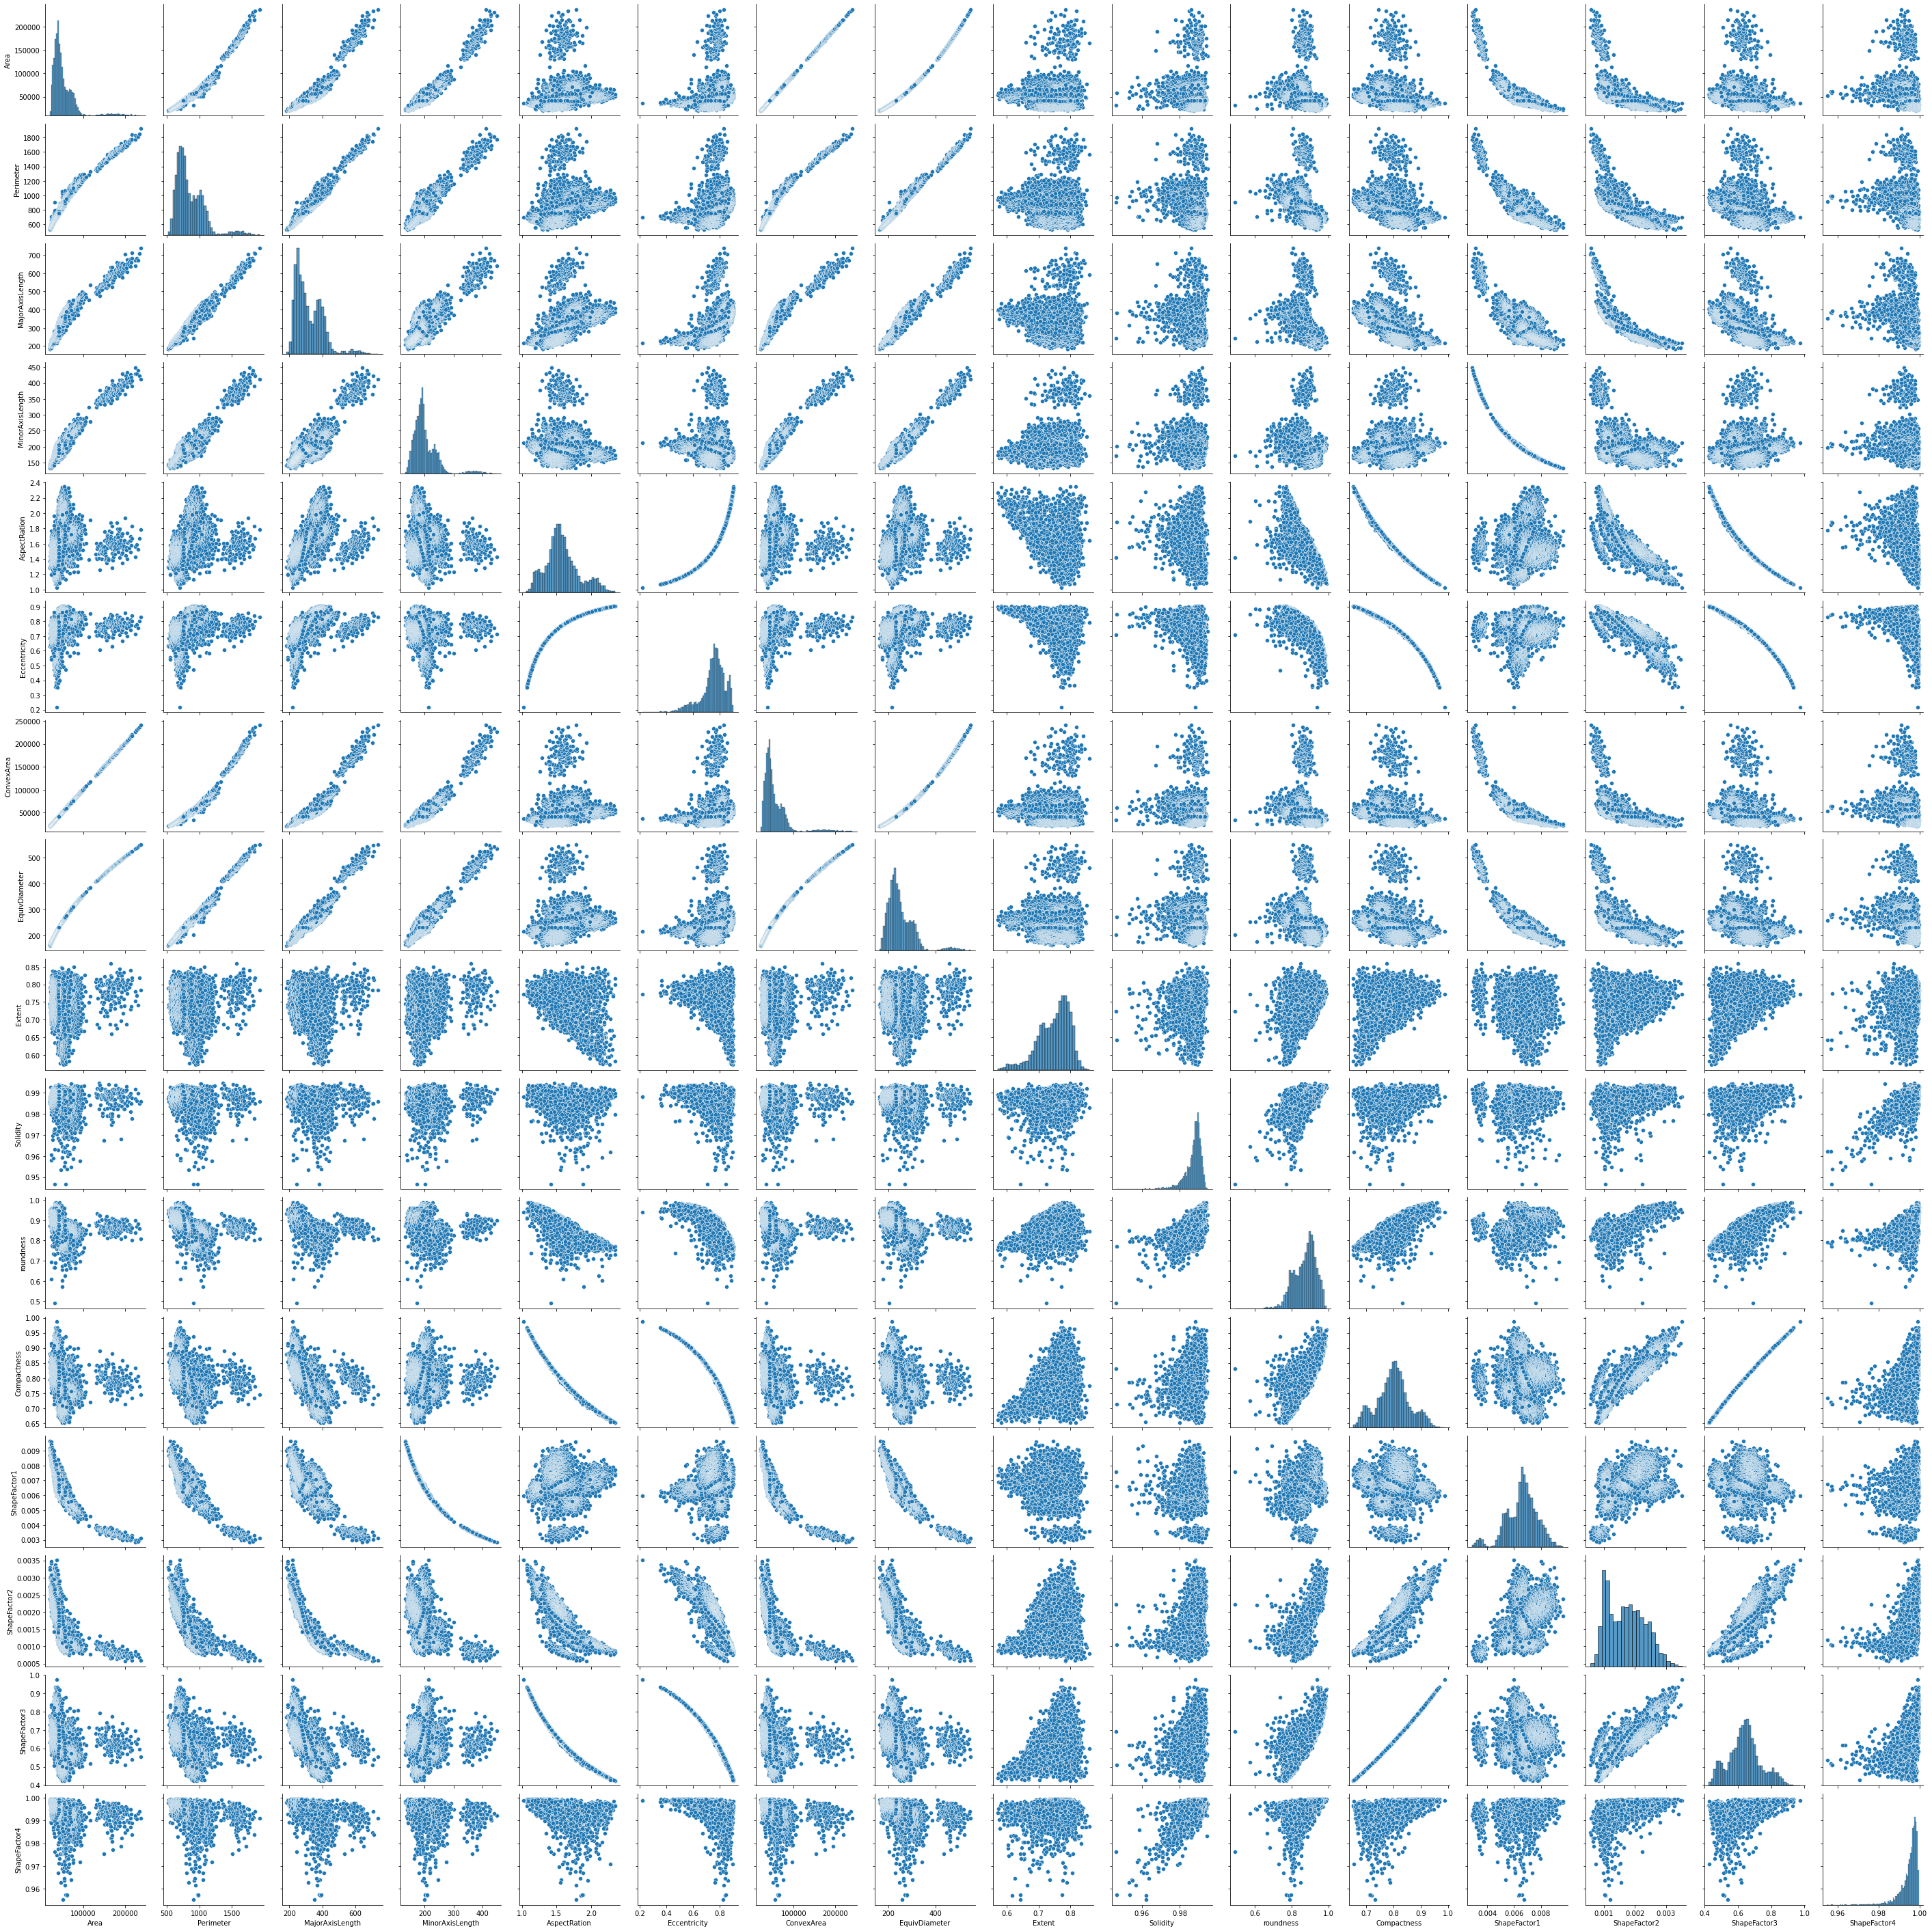

In [14]:
sns.pairplot(df_test)

In [15]:
df_test.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [16]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [17]:
## Checking Multicollinearity 

    
X = df_test.iloc[:,:-1]
calc_vif(X)

variables           VIF
0              Area  4.359045e+05
1         Perimeter  7.025614e+04
2   MajorAxisLength  1.267851e+06
3   MinorAxisLength  1.551329e+06
4      AspectRation  1.653306e+05
5      Eccentricity  2.477695e+04
6        ConvexArea  4.289986e+05
7     EquivDiameter  5.826657e+06
8            Extent  2.873058e+02
9          Solidity  7.262008e+05
10        roundness  2.582744e+04
11      Compactness  2.724987e+06
12     ShapeFactor1  2.048509e+04
13     ShapeFactor2  1.126771e+04
14     ShapeFactor3  6.014441e+05
15     ShapeFactor4  2.949370e+06

In [18]:
df_test.drop('EquivDiameter', inplace=True, axis=1)




In [19]:
df_test.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'Extent', 'Solidity',
       'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [20]:
## Checking Multicollinearity after removing EquivDiameter

    
X = df_test.iloc[:,:-1]
calc_vif(X)

variables           VIF
0              Area  3.141411e+05
1         Perimeter  6.709552e+04
2   MajorAxisLength  6.703120e+04
3   MinorAxisLength  4.032118e+04
4      AspectRation  4.069639e+04
5      Eccentricity  2.450492e+04
6        ConvexArea  3.147827e+05
7            Extent  2.872649e+02
8          Solidity  6.262104e+05
9         roundness  2.507528e+04
10      Compactness  2.012853e+06
11     ShapeFactor1  1.755920e+04
12     ShapeFactor2  1.011219e+04
13     ShapeFactor3  5.937726e+05
14     ShapeFactor4  2.884631e+05

In [21]:
df_test.shape


(4083, 16)

In [22]:
df_test.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'Extent', 'Solidity',
       'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

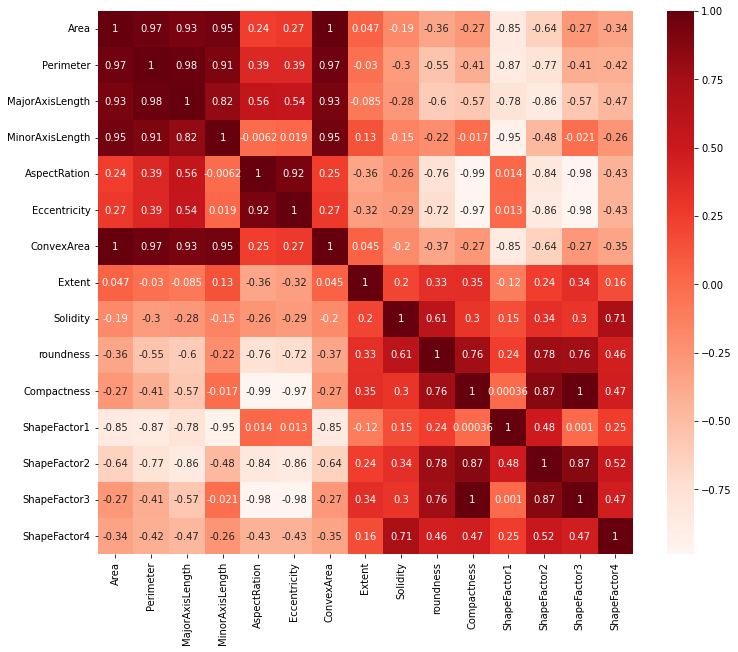

In [23]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

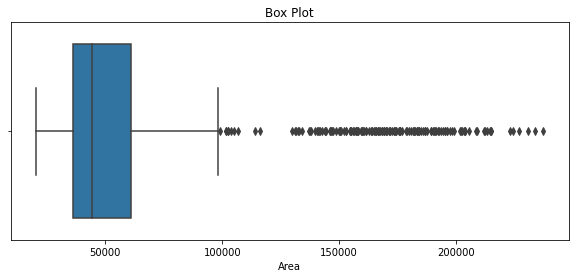

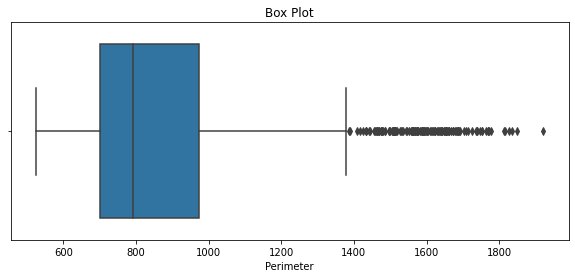

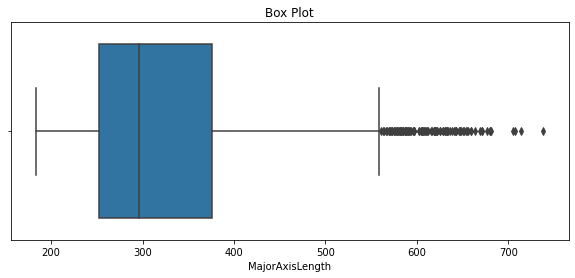

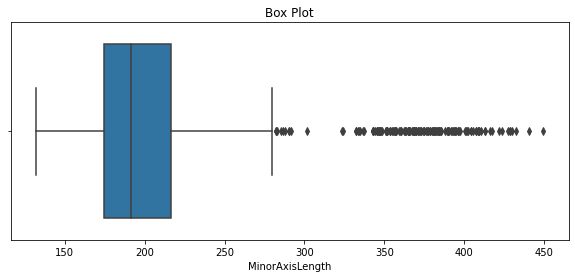

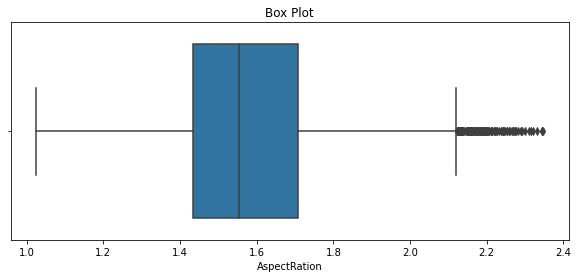

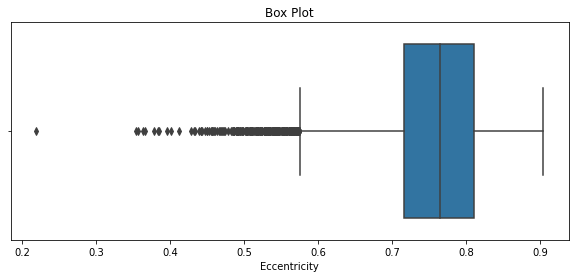

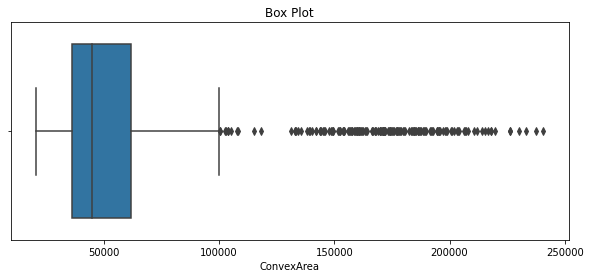

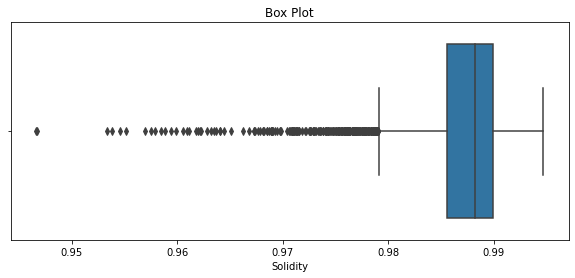

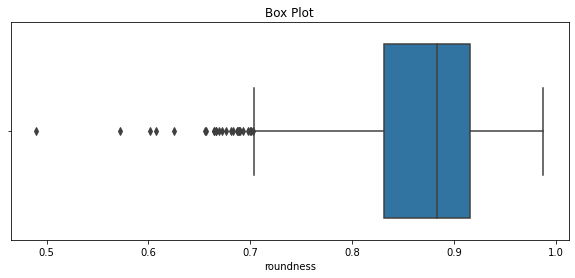

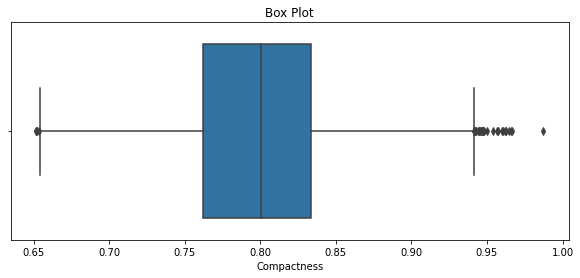

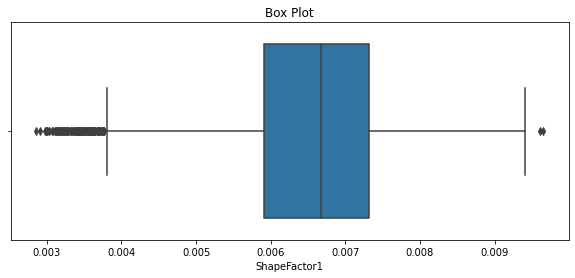

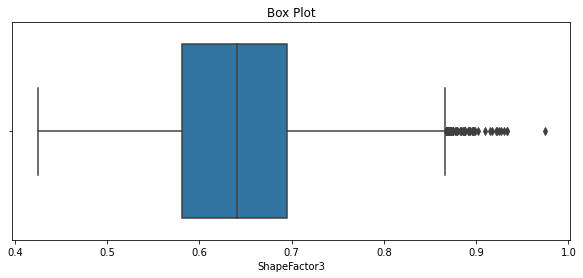

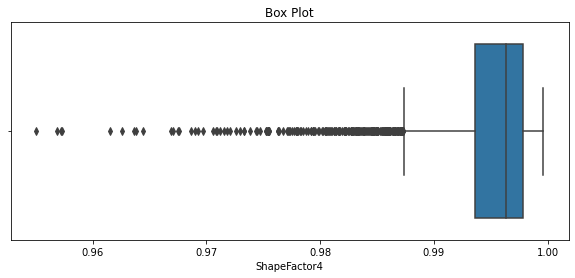

In [24]:
def Box_plots(df_test):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df_test)
    plt.show()
Box_plots(df_test['Area'])    # Outliers present

def Box_plots(df_test):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df_test)
    plt.show()
Box_plots(df_test['Perimeter'])  # Outliers present

def Box_plots(df_test):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df_test)
    plt.show()
Box_plots(df_test['MajorAxisLength']) # Outliers present

def Box_plots(df_test):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df_test)
    plt.show()
Box_plots(df_test['MinorAxisLength']) # Outliers present

def Box_plots(df_test):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df_test)
    plt.show()
Box_plots(df_test['AspectRation']) # Outliers present

def Box_plots(df_test):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df_test)
    plt.show()
Box_plots(df_test['Eccentricity']) # Outliers present

def Box_plots(df_test):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df_test)
    plt.show()
Box_plots(df_test['ConvexArea']) # Outliers present


def Box_plots(df_test):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df_test)
    plt.show()
Box_plots(df_test['Extent']) # Outliers present

def Box_plots(df_test):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df_test)
    plt.show()
Box_plots(df_test['Solidity']) # Outliers present


def Box_plots(df_test):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df_test)
    plt.show()
Box_plots(df_test['roundness']) # Outliers present

def Box_plots(df_test):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df_test)
    plt.show()
Box_plots(df_test['Compactness']) # Outliers present

def Box_plots(df_test):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df_test)
    plt.show()
Box_plots(df_test['ShapeFactor1']) # Outliers present

def Box_plots(df_test):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df_test)
    plt.show()
Box_plots(df_test['ShapeFactor2']) # No Outliers present

def Box_plots(df_test):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df_test)
    plt.show()
Box_plots(df_test['ShapeFactor3']) # Outliers present

def Box_plots(df_test):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df_test)
    plt.show()
Box_plots(df_test['ShapeFactor4'])  # Outliers present

In [25]:
Q1 = df_test.quantile(0.25)
Q3 = df_test.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df_test = df_test[~((df_test < (Q1 - 1.5 * IQR)) |(df_test > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_test.shape)

Area               24948.000000
Perimeter            272.834500
MajorAxisLength      122.758139
MinorAxisLength       42.021317
AspectRation           0.275083
Eccentricity           0.094283
ConvexArea         25447.000000
Extent                 0.069940
Solidity               0.004333
roundness              0.085096
Compactness            0.071881
ShapeFactor1           0.001409
ShapeFactor2           0.001015
ShapeFactor3           0.114701
ShapeFactor4           0.004200
dtype: float64
(3213, 16)


In [26]:
df_test.shape

(3213, 16)

In [27]:
test_scatter = df_test[(df_test['Class']=='HOROZ') | 
                    (df_test['Class']=='DERMASON') | 
                    (df_test['Class']=='SEKER') |
                    (df_test['Class']=='BARBUNYA') |
                    (df_test['Class']=='SIRA') |
                    (df_test['Class']=='CALI')]
                   
fig = px.scatter(test_scatter, x="Area", y="Perimeter", color="Class", symbol="Class")
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

<Figure size 720x576 with 0 Axes>

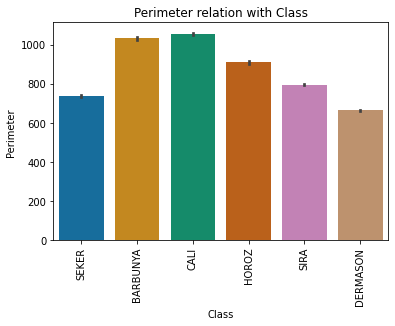

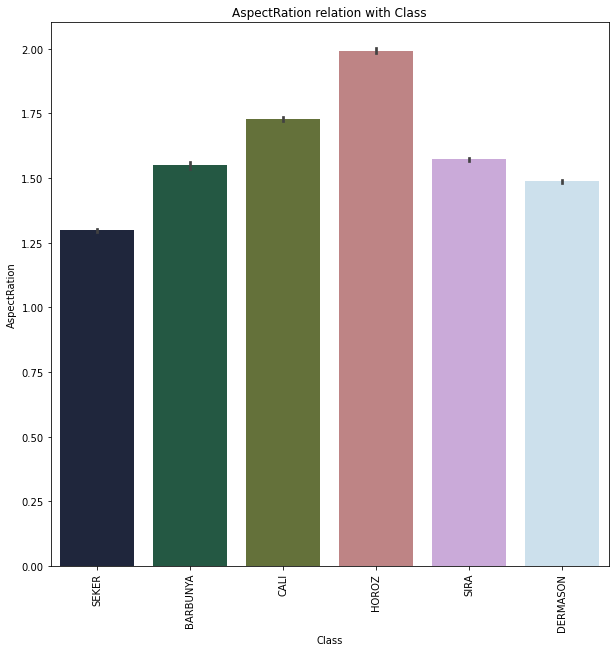

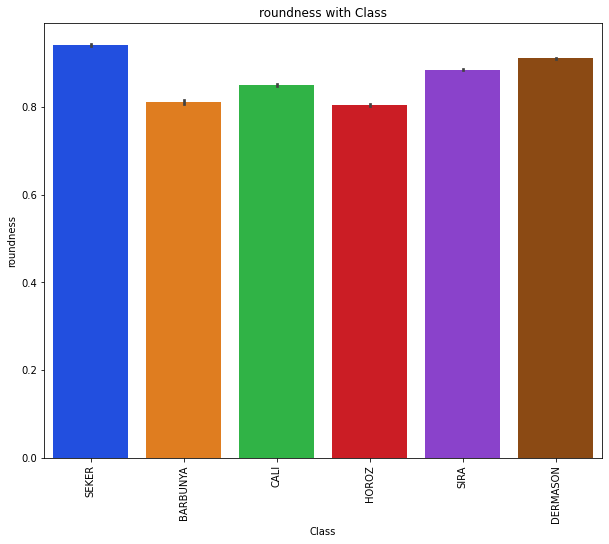

<Figure size 720x576 with 0 Axes>

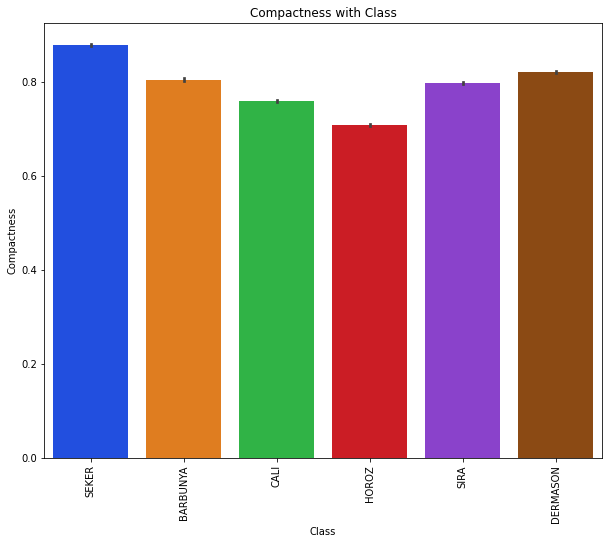

<Figure size 720x576 with 0 Axes>

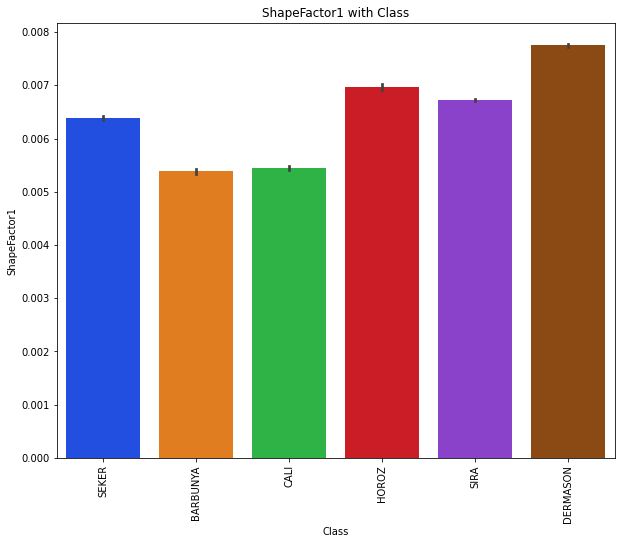

<Figure size 720x576 with 0 Axes>

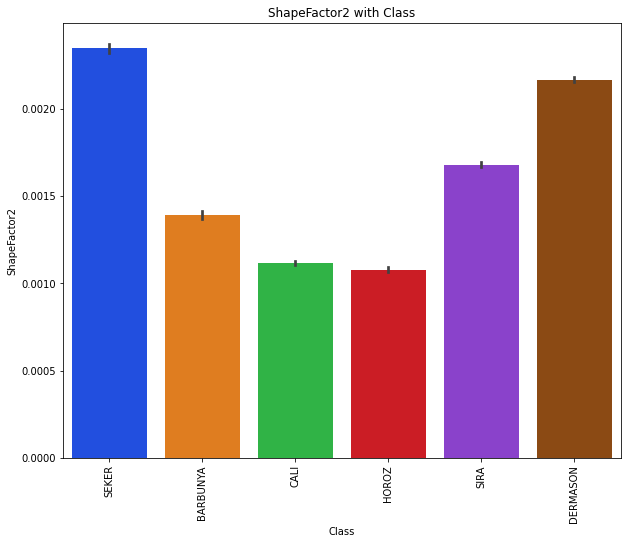

<Figure size 720x576 with 0 Axes>

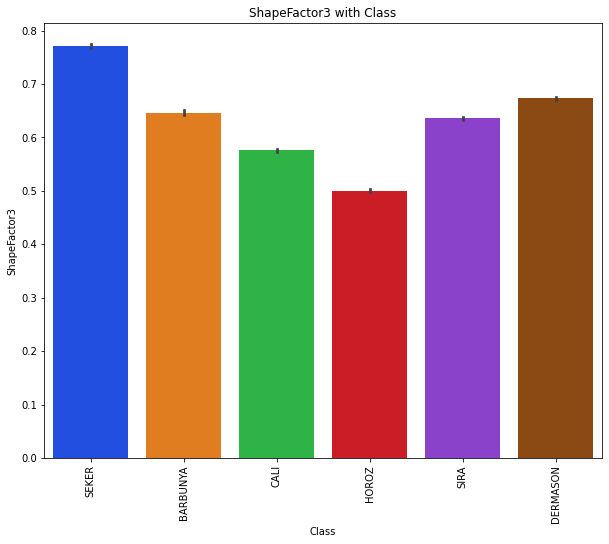

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [28]:


plt.title("Perimeter relation with Class")
sns.barplot(y="Perimeter",x="Class", data=df_test,palette="colorblind")
plt.xticks(rotation='vertical')
plt.ylabel("Perimeter ")
plt.xlabel("Class")
plt.figure(figsize=(10,10))


plt.title("AspectRation relation with Class")
sns.barplot(y="AspectRation",x="Class", data=df_test,palette="cubehelix")
plt.xticks(rotation='vertical')
plt.ylabel("AspectRation")
plt.xlabel("Class")

plt.figure(figsize=(10,8))
plt.title("roundness with Class")
sns.barplot(y="roundness",x="Class", data=df_test,palette='bright')
plt.xticks(rotation='vertical')
plt.ylabel("roundness")
plt.xlabel("Class")
plt.figure(figsize=(10,8))

plt.figure(figsize=(10,8))
plt.title("Compactness with Class")
sns.barplot(y="Compactness",x="Class", data=df_test,palette='bright')
plt.xticks(rotation='vertical')
plt.ylabel("Compactness")
plt.xlabel("Class")
plt.figure(figsize=(10,8))

plt.figure(figsize=(10,8))
plt.title("ShapeFactor1 with Class")
sns.barplot(y="ShapeFactor1",x="Class", data=df_test,palette='bright')
plt.xticks(rotation='vertical')
plt.ylabel("ShapeFactor1")
plt.xlabel("Class")
plt.figure(figsize=(10,8))

plt.figure(figsize=(10,8))
plt.title("ShapeFactor2 with Class")
sns.barplot(y="ShapeFactor2",x="Class", data=df_test,palette='bright')
plt.xticks(rotation='vertical')
plt.ylabel("ShapeFactor2")
plt.xlabel("Class")
plt.figure(figsize=(10,8))

plt.figure(figsize=(10,8))
plt.title("ShapeFactor3 with Class")
sns.barplot(y="ShapeFactor3",x="Class", data=df_test,palette='bright')
plt.xticks(rotation='vertical')
plt.ylabel("ShapeFactor3")
plt.xlabel("Class")
plt.figure(figsize=(10,8))

plt.figure(figsize=(10,8))
plt.title("ShapeFactor3 with Class")
sns.barplot(y="ShapeFactor4",x="Class", data=df_test,palette='bright')
plt.xticks(rotation='vertical')
plt.ylabel("ShapeFactor4")
plt.xlabel("Class")
plt.figure(figsize=(10,8))

plt.figure(figsize=(10,8))
plt.title("ShapeFactor4 with Class")
sns.barplot(y="ShapeFactor4",x="Class", data=df_test,palette='bright')
plt.xticks(rotation='vertical')
plt.ylabel("ShapeFactor4")
plt.xlabel("Class")
plt.figure(figsize=(10,8))



In [29]:
# Normalization of data

cols_to_norm = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']
    
df_test[cols_to_norm] = df_test[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [30]:
df_test.shape

(3213, 16)

In [31]:
df_test.to_csv('formulatedtest.csv',index=False)